# Sıfırdan Simple Linear Regresyon Oluşturma

In [159]:
import numpy as np
import matplotlib.pyplot as plt

In [160]:
class SimpleLinearRegression:
    def __init__(self):
        #Modelin parametrelerini oluşturma
        self.m=0#eğim(m)
        self.b=0#kesişim(b)
        self.history={"loss":[]} #Modeli eğitirken kaybı takip etmek için

    def fit(self,X,y,learning_rate=0.01,iterations=1000):
        """
        Doğrusal regresyon modelini verilen veri üzerinde eğitir.
        Parametreler:
        X:Bağımsız değişken(features)
        y:Bağımlı değişken(target)
        learning_rate:Gradyan inişi için öğrenme oranı
        -(Gradyan inişi, bir fonksiyonun eğimini (türevi) kullanarak,
        o fonksiyonun minimumuna doğru adım adım yaklaşma yöntemidir)
        iterations:Eğitim iterasyon sayısı
        """
        #Özelliklerin sayısını al
        n_samples=len(X)

        #Gradyan inişi algoritması
        for i in range(iterations):
            #Mevcut parametreler ile tahminleri hesapla
            y_pred=self.predict(X)

            #Gradyanları hesapla(türevler)
            #Ortalama kare hatası(MSE) kaybının gradyanları
            dm=(-2/n_samples) * np.sum(X* (y-y_pred)) #m için gradyan
            db=(-2/n_samples) * np.sum(y-y_pred) #b için gradyan

            #Parametreleri güncelle
            self.m=self.m - learning_rate*dm
            self.b=self.b - learning_rate*db

            #Mevcut kayıp değerlerini hesapla ve kaydet
            loss=self.mse_loss(y,y_pred)
            self.history["loss"].append(loss)

            #Her 100 iterasyonda bir ilerlemeyi göster
            if i%100==0:
                print(f"İterasyon {i}, Kayıp: {loss}")

    def predict(self,X):
        """
        Verilen X değerleri için tahminler yapar
        Parametre:
        X:Bağımsız değişken
        
        Döndürülen değer:
        Tahmin edilen y değerleri
        """
        # y=mx+b formülünü uygula
        return self.m*X +self.b
    
    def mse_loss(self,y_true,y_pred):
        """
        Ortalama Kare Hatası (MSE) hesaplar

        Parametreler:
        y_true:Gerçek y değerleri
        y_pred:Tahmin edilen y değerleri

        Döndürülen değer:
        MSE değeri
        """
        
        #MSE = (1/n) * Σ(y_true-y_pred)²
        return np.mean((y_true - y_pred)**2)

    def plot_regression_line(self,X,y):
        """
        Veri noktalarını ve regresyon doğrusunu görselleştirir

        Parametreler:
        X:Bağımsız değişken
        y:Bağımlı değişken
        """
        plt.figure(figsize=(10,6))

        #Veri noktalarını çiz
        plt.scatter(X,y,color="blue",label="Veri noktaları")

        #Regresyon doğrusunu çiz
        y_pred=self.predict(X)
        plt.plot(X,y_pred,color="red",label=f"Regresyon Doğrusu (y={self.m:.2f}x + {self.b:.2f})")
        plt.title("Basit Doğrusal Regresyon")
        plt.xlabel("X -Bağımsız Değişken-")
        plt.ylabel("y -Bağımlı Değişken-")
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_loss_history(self):
            """
            Eğitim sırasındaki kayıp değerlerinin değişimini görselleştirir
            """
            plt.figure(figsize=(10,6))
            plt.plot(self.history["loss"])
            plt.title("Eğitim Kaybı")
            plt.xlabel("İterasyon")
            plt.ylabel("MSE kaybı")
            plt.grid(True)
            plt.show()

Eğitim başlıyor
İterasyon 0, Kayıp: 252.71253492455878
İterasyon 100, Kayıp: 3.128368110048479
İterasyon 200, Kayıp: 1.3272447324894032
İterasyon 300, Kayıp: 0.7031634703873797
İterasyon 400, Kayıp: 0.48692208095258943
İterasyon 500, Kayıp: 0.41199539857281253
İterasyon 600, Kayıp: 0.38603363543804087
İterasyon 700, Kayıp: 0.37703799965572166
İterasyon 800, Kayıp: 0.37392105175399104
İterasyon 900, Kayıp: 0.37284104313012123
Eğitim tamamlandı...Eğim (m): 2.0136 Kesişim (b): 5.8620


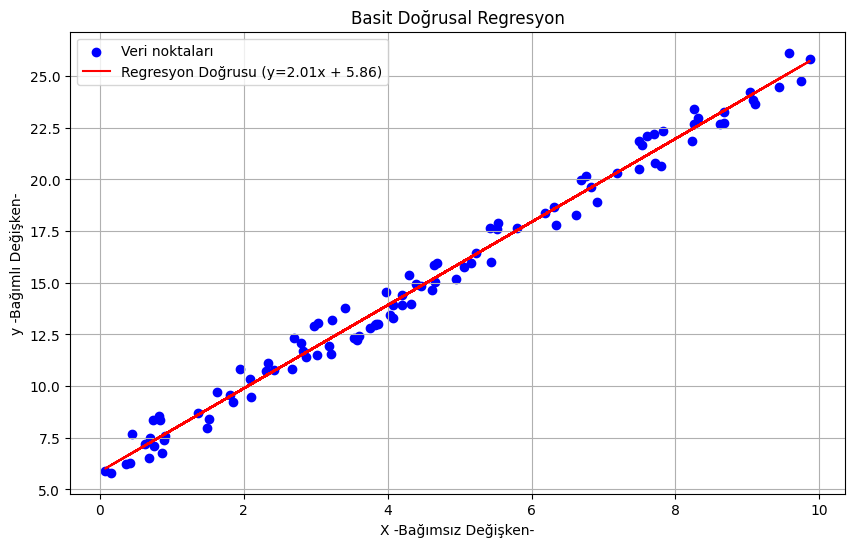

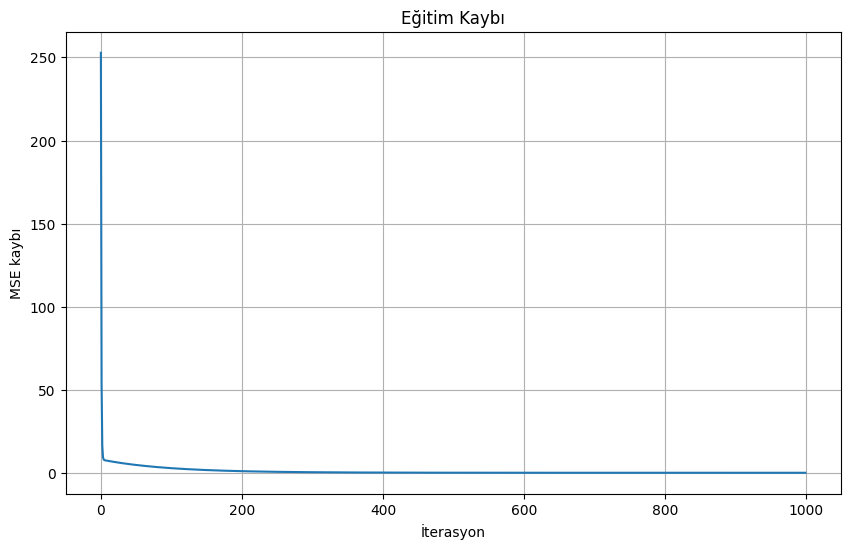

YENİ TAHMİNLER:
X= 3.1 için tahmin: 12.104
X= 6.9 için tahmin: 19.756
X= 7.5 için tahmin: 20.964


In [163]:
#Örnek kullanım
if __name__ =="__main__":
    #Rastgele veri oluştur
    np.random.seed(31)
    X=np.random.rand(100,1) * 10 #0 ila 10 arasında 100 rastgele sayı
    #gerçek model formülü y=2x+5+gürültü
    y= 2* X.flatten() + 5 + np.random.rand(100) *2 #Gürültü ekle
    #Flatten bir çok boyutlu (multi-dimensional) diziyi tek boyutlu (1D) hale getirir. Yani diziyi düzleştirir.

    #Modeli oluştur
    model=SimpleLinearRegression()

    #Modeli Eğit
    print("Eğitim başlıyor")
    model.fit(X.flatten(),y,learning_rate=0.01,iterations=1000)
    print(f"Eğitim tamamlandı...Eğim (m): {model.m:.4f} Kesişim (b): {model.b:.4f}")

    #Sonucu görselleştir
    model.plot_regression_line(X.flatten(),y)
    model.plot_loss_history()

    #Yeni tahminler yap
    yeni_X=np.array([3.1,6.9,7.5])
    tahmin=model.predict(yeni_X)
    print("YENİ TAHMİNLER:")
    for x,pred in zip(yeni_X,tahmin):
        print(f"X= {x} için tahmin: {pred:.3f}")